In [6]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 15.1 MB/s eta 0:00:01    |█████                           | 2.9 MB 15.1 MB/s eta 0:00:02
     |████████████████████████████████| 8.0 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 42.5 MB/s eta 0:00:01


In [69]:
#import packages

#cleaning/manipulation
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#import data

PercentVaxxed=pd.read_csv('PercentPopVaxxed.csv')

In [3]:
PercentVaxxed.head()

,continent,location,date,population,new_vaccinations,rolling_total_vax
0,Asia,Afghanistan,2020-02-24 00:00:00,38928341.0,NaN,NaN
1,Asia,Afghanistan,2020-02-24 00:00:00,38928341.0,NaN,NaN
2,Asia,Afghanistan,2020-02-24 00:00:00,38928341.0,NaN,NaN
3,Asia,Afghanistan,2020-02-24 00:00:00,38928341.0,NaN,NaN
4,Asia,Afghanistan,2020-02-24 00:00:00,38928341.0,NaN,NaN


In [14]:
#create sub dataframe
PercentVaxMax=PercentVaxxed[PercentVaxxed['date']==PercentVaxxed.date.max()]

In [34]:
#change name of USA so that they match in both datasets

for i in PercentVaxMax.index:
    if PercentVaxMax.loc[i, 'location'] =='United States':
        PercentVaxMax.loc[i,'location']='United States of America'

/Users/sarahrussell/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [35]:
#visualize vaccination rate per continent 

#read in base map
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [36]:
df_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [37]:
#merge base map with vaccination data

df_world_vax = df_world.merge(PercentVaxMax, how="left", left_on=['name'], right_on=['location'])

In [38]:
df_world_vax.head()

,pop_est,continent_x,name,iso_a3,gdp_md_est,geometry,continent_y,location,date,population,new_vaccinations,rolling_total_vax
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Oceania,Fiji,2021-04-30 00:00:00,896444.0,NaN,452720.0
1,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Oceania,Fiji,2021-04-30 00:00:00,896444.0,NaN,452720.0
2,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Oceania,Fiji,2021-04-30 00:00:00,896444.0,NaN,452720.0
3,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Oceania,Fiji,2021-04-30 00:00:00,896444.0,NaN,452720.0
4,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Oceania,Fiji,2021-04-30 00:00:00,896444.0,NaN,452720.0


In [39]:
#add column for Percent of Pop Vaxxed

df_world_vax['PercentVaxxed']=df_world_vax['rolling_total_vax']/df_world_vax['population']

Text(0.5, 1.0, 'Percent of Country Vaccinated as of April 2021')

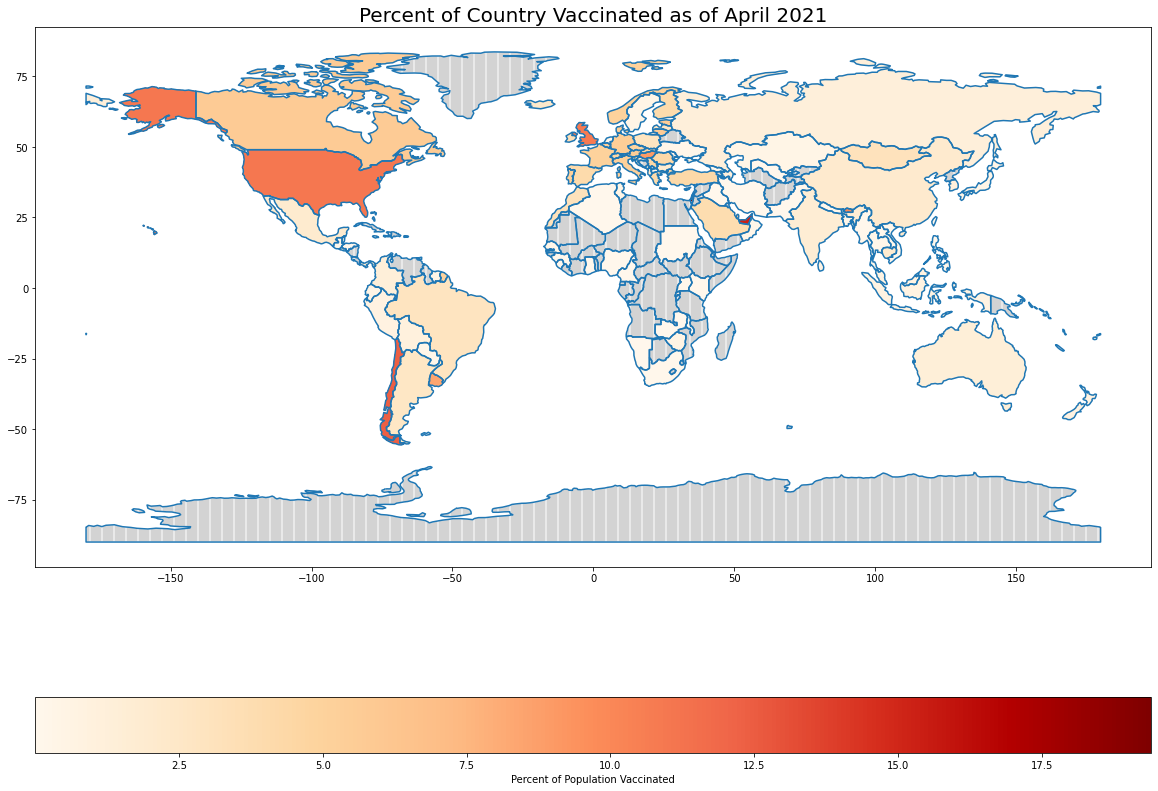

In [71]:
#create visualization to show vaccination rates throughout world
#grey indicates missing data/no data

ax = df_world["geometry"].boundary.plot(figsize=(20,16)) #create boundary of map

df_world_vax.plot( column="PercentVaxxed", ax=ax, cmap='OrRd', 
                     legend=True, legend_kwds={"label": "Percent of Population Vaccinated", 
                                               "orientation":"horizontal"},
                     missing_kwds={'color': 'lightgrey', "edgecolor": "white", "hatch": "|"})


ax.set_title("Percent of Country Vaccinated as of April 2021",
            fontsize=20)


In [54]:
# additional sub df for plotting

top_10_vax=df_world_vax.groupby('location')['PercentVaxxed'].max().reset_index().sort_values('PercentVaxxed', ascending=False).head(10)

In [80]:
import matplotlib.ticker as mtick

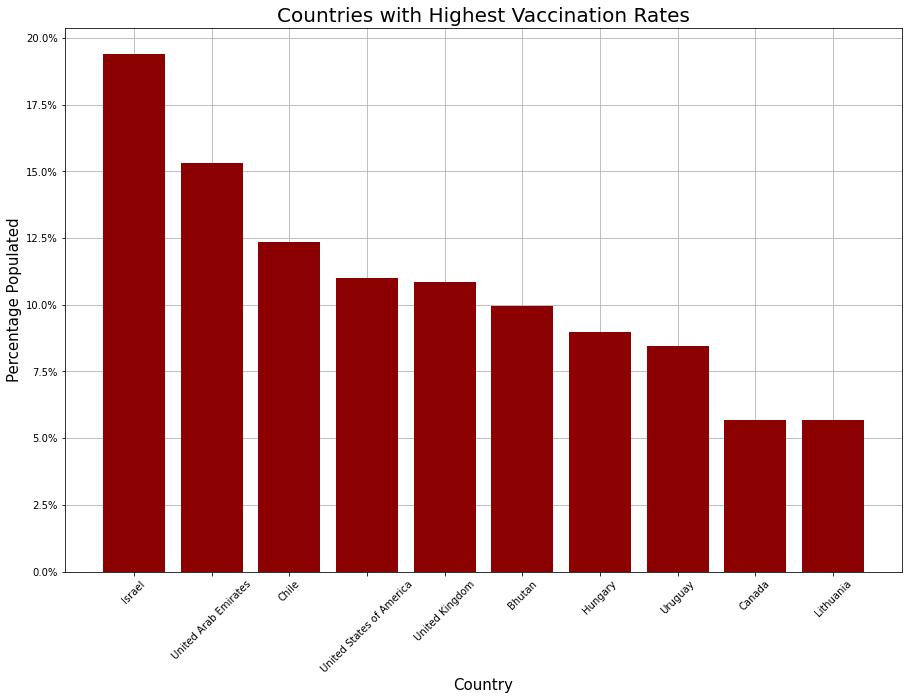

In [118]:
# create simple bar chart to show countries with highest vaccination rates


fig, ax= plt.subplots(figsize=(15,10))

ax.bar(top_10_vax['location'], top_10_vax['PercentVaxxed'],
      color='darkred')

plt.title('Countries with Highest Vaccination Rates',
         fontsize=20)

plt.xticks(rotation=45)

plt.xlabel('Country', fontsize=15)

plt.ylabel('Percentage Populated', fontsize=15)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.grid()
ax.set_axisbelow(True)


plt.show()